# Pujan Shrestha
# Student id: C0901167
# 2024S-T3 AML 3104 - Neural Networks and Deep Learning 01

### importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

### importing dataset

In [2]:
df=pd.read_csv('Algerian_forest_fires_cleaned.csv') #read csv fil
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### Summary of dataset

In [3]:
#describe the datatype of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [4]:
#LIST ALL THE COLUMNS IN DATASET
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
#find all the unique values count in each column
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            125
Classes          8
Region           2
dtype: int64

### Checking null values

In [6]:
## missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [7]:
#setting values for region less than 122 0 and more than region 122 :1
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
df=df

In [8]:
#Information about the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [9]:
#changing region as int type in last column which is int64 to int32
df[['Region']]=df[['Region']].astype(int)

In [10]:
#if data has nulll value calculate the sum of null value in each column
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [11]:
## Removing the null values
df=df.dropna().reset_index(drop=True)

In [12]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [14]:
##remove the 122nd row
df=df.drop(122).reset_index(drop=True)

In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1


In [16]:
#all columns in dataset
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
## fix spaces in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
#type casting all as int type to individual column
df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          242 non-null    int32  
 1   month        242 non-null    int32  
 2   year         242 non-null    int32  
 3   Temperature  242 non-null    int32  
 4   RH           242 non-null    int32  
 5   Ws           242 non-null    int32  
 6   Rain         242 non-null    float64
 7   FFMC         242 non-null    float64
 8   DMC          242 non-null    float64
 9   DC           242 non-null    float64
 10  ISI          242 non-null    float64
 11  BUI          242 non-null    float64
 12  FWI          242 non-null    float64
 13  Classes      242 non-null    object 
 14  Region       242 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 21.9+ KB


In [20]:
# objects=[features for features in df.columns if df[features].dtypes=='O']

In [21]:
# for i in objects:
#     if i!='Classes':
#         df[i]=df[i].astype(float)

In [22]:
# df.info()

In [23]:
#describe the mathematical detail
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,242.000000,242.000000,242.0,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,15.822314,7.508264,2012.0,32.152893,62.004132,15.508264,0.763223,77.928099,14.730992,49.601240,4.759504,16.747934,7.063636,0.495868
std,8.809501,1.112888,0.0,3.635545,14.847635,2.808171,2.007354,14.316912,12.393811,47.690192,4.154248,14.229690,7.442923,0.501019
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.250000,14.000000,0.000000,72.375000,5.800000,14.325000,1.400000,6.025000,0.725000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.250000,3.500000,12.450000,4.450000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.750000,17.000000,0.500000,88.300000,20.850000,70.050000,7.275000,22.775000,11.525000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [24]:
df.drop(['day','month','year'],axis=1,inplace =True) #date doesn't affect in any way so we drop these columns

In [25]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
## categories in classes
df['Classes'].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [27]:
## Encoding of the categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [28]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [29]:
df['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

### Plot desnity plot for all features

C:\Users\buzzp\AppData\Local\Temp\ipykernel_13224\2171285287.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


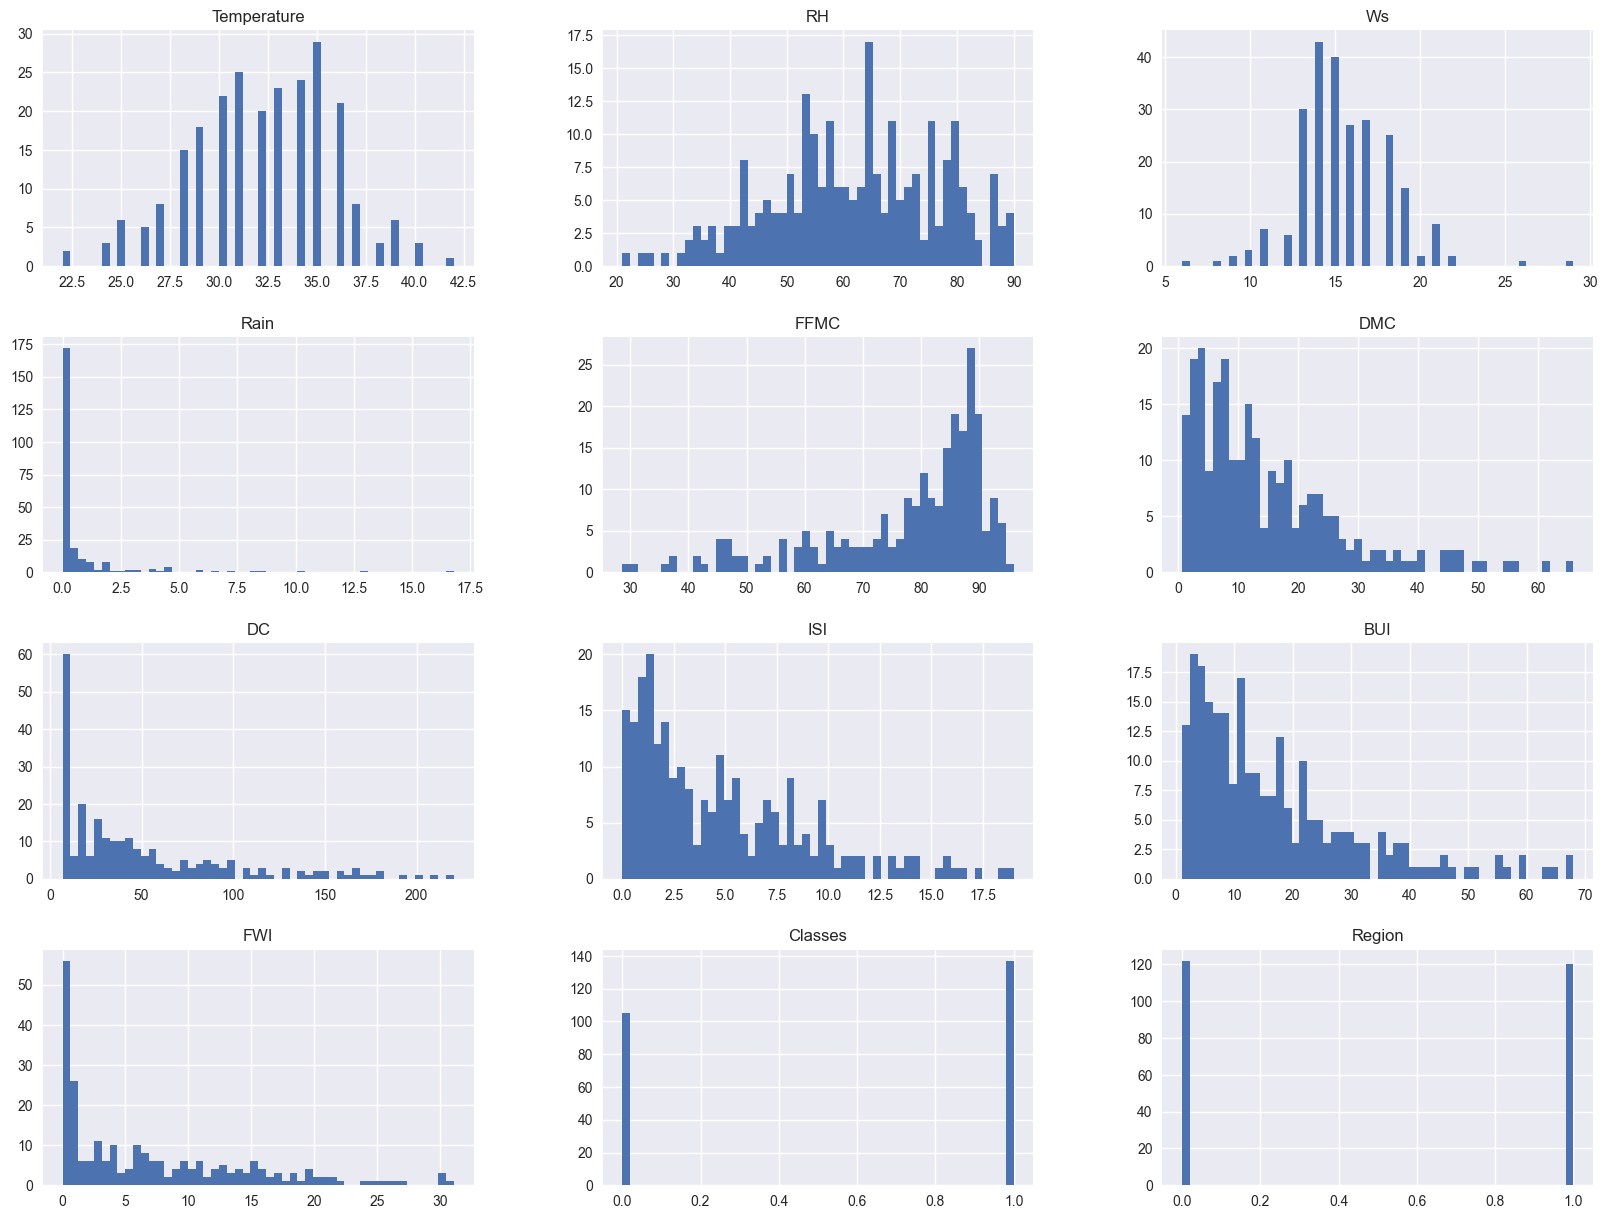

In [30]:
## Plot desnity plot for all features
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

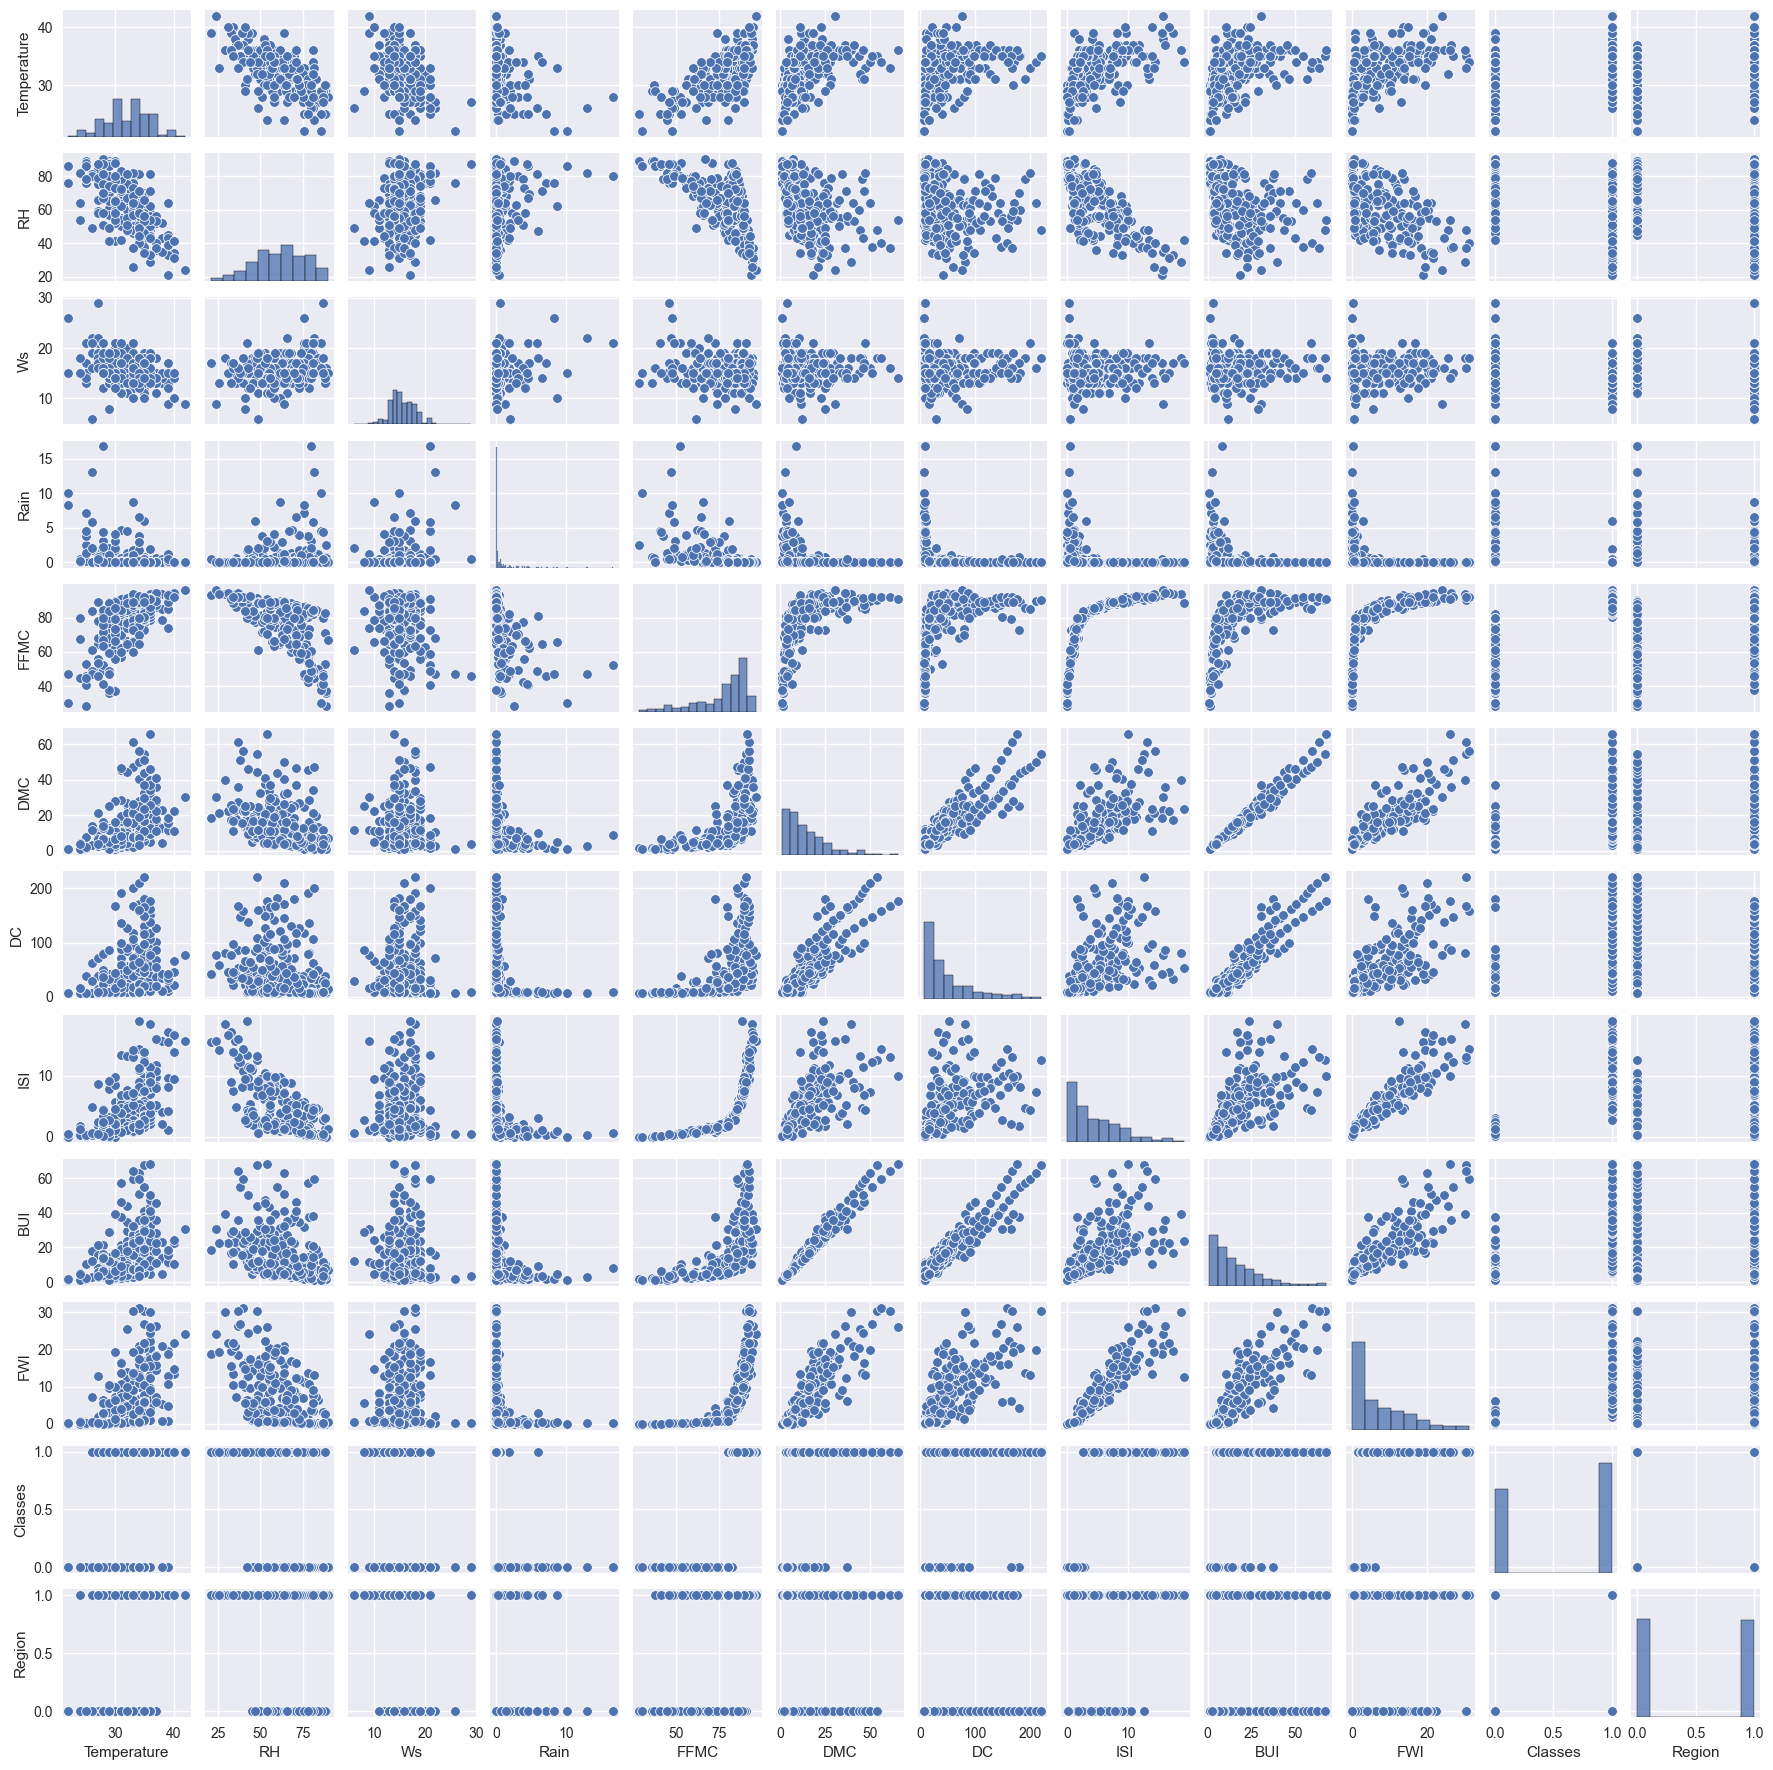

In [31]:
sns.pairplot(df,height=1.5,
    aspect=1,)

<Axes: >

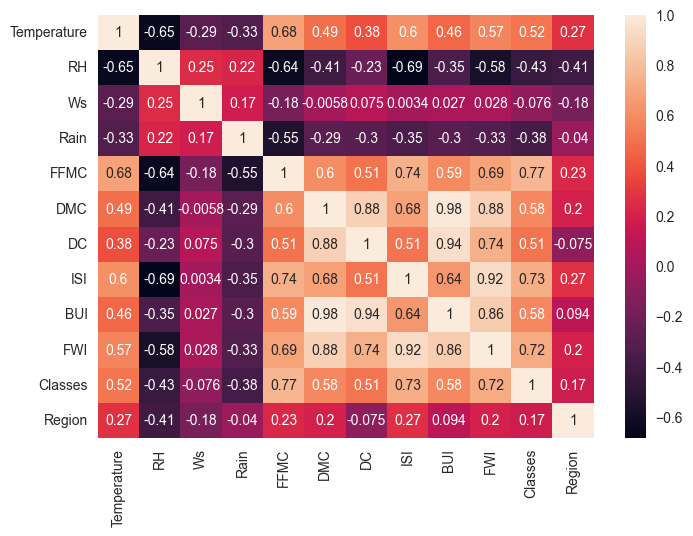

In [32]:
#creating a heatmap
sns.heatmap(df.corr(),annot=True)

<Axes: ylabel='FWI'>

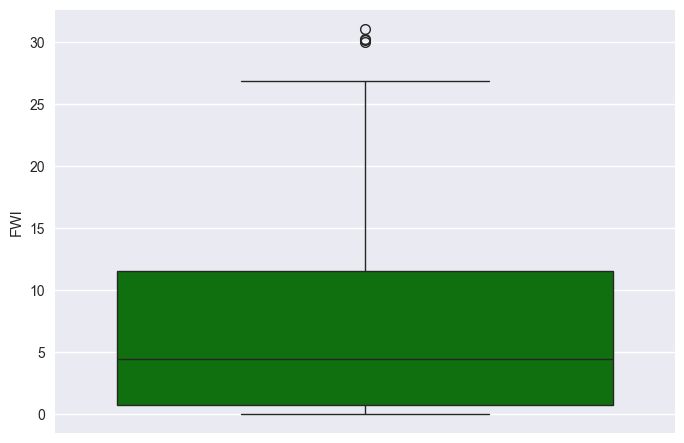

In [33]:
## Box Plots
sns.boxplot(df['FWI'],color='green')

## Train_Test_Split

In [34]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [35]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [36]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [37]:
#Train Test Split 80 and 20 for model training and unseen value
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((193, 11), (49, 11), (193,), (49,))

In [39]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647531,-0.297697,-0.311355,0.694357,0.462167,0.358537,0.608515,0.437482,0.522337,0.246195
RH,-0.647531,1.000000,0.258048,0.218531,-0.631476,-0.402228,-0.230100,-0.693536,-0.349333,-0.438708,-0.377981
Ws,-0.297697,0.258048,1.000000,0.219183,-0.164594,0.003448,0.103009,0.004314,0.039918,-0.054072,-0.235926
Rain,-0.311355,0.218531,0.219183,1.000000,-0.538012,-0.284692,-0.300813,-0.350622,-0.295864,-0.373879,-0.056123
FFMC,0.694357,-0.631476,-0.164594,-0.538012,1.000000,0.611813,0.528732,0.756439,0.600372,0.787645,0.233958
DMC,0.462167,-0.402228,0.003448,-0.284692,0.611813,1.000000,0.882328,0.688327,0.984279,0.601588,0.178534
DC,0.358537,-0.230100,0.103009,-0.300813,0.528732,0.882328,1.000000,0.546671,0.949702,0.533813,-0.101351
ISI,0.608515,-0.693536,0.004314,-0.350622,0.756439,0.688327,0.546671,1.000000,0.654072,0.749306,0.271114
BUI,0.437482,-0.349333,0.039918,-0.295864,0.600372,0.984279,0.949702,0.654072,1.000000,0.596645,0.076923
Classes,0.522337,-0.438708,-0.054072,-0.373879,0.787645,0.601588,0.533813,0.749306,0.596645,1.000000,0.182029


In [40]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [41]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [42]:
corr_features

{'BUI', 'DC'}

In [43]:
## drop features when correlation is more than 0.85 
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((193, 9), (49, 9))

In [44]:
#scaling using 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [45]:
X_train_scaled

array([[-0.85263349,  0.17900419,  1.26888218, ..., -0.7883496 ,
        -1.12720372, -1.00519484],
       [ 0.22820896, -1.70297764,  0.18046324, ...,  1.97198365,
         0.88715108,  0.99483201],
       [ 0.76863019, -1.03084127,  0.90607587, ..., -0.40761398,
         0.88715108,  0.99483201],
       ...,
       [-1.93347595,  0.9183542 ,  0.54326955, ..., -1.09769729,
        -1.12720372, -1.00519484],
       [ 1.03884081, -0.42591854,  0.18046324, ...,  0.80598081,
         0.88715108,  0.99483201],
       [-0.58242288,  0.98556784,  1.9944948 , ..., -0.8835335 ,
        -1.12720372, -1.00519484]])

C:\Users\buzzp\AppData\Local\Temp\ipykernel_13224\160744393.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


Text(0.5, 1.0, 'X_train After Scaling')

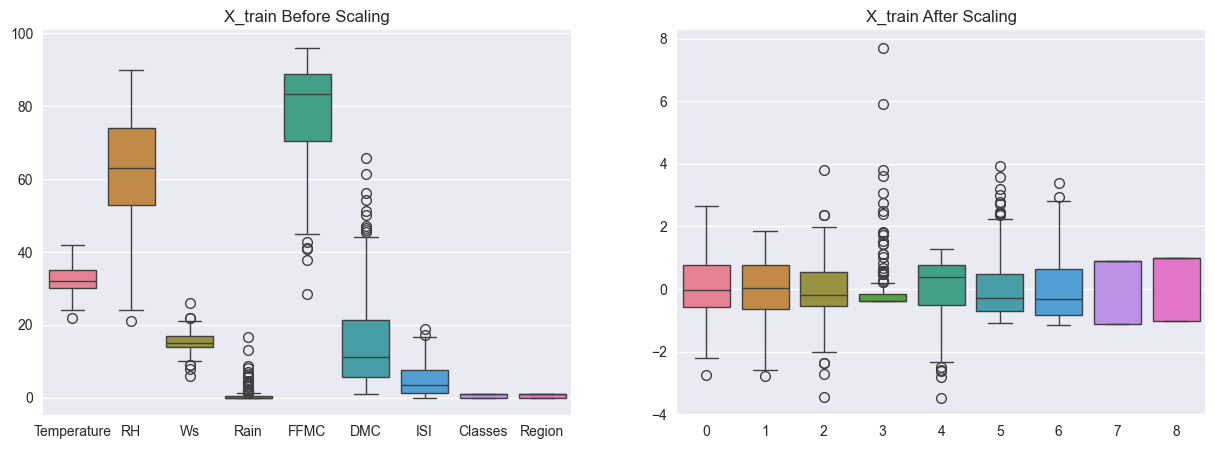

In [46]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

### Linear Regression 

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5305466701106838
R2 Score 0.982465500980637


### Lasso Regression

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.0554887909702009
R2 Score 0.9496927236027399


### Ridge Regression

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5541322676246603
R2 Score 0.9817118864272071


### ElasticNet

In [50]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.7852089888336102
R2 Score 0.8734584757078916


# Pickle Creation 

In [51]:
import pickle
#since linear and ridge had the highest R2 score we will be using the model for predictions
pickle.dump(linreg, open('linear_model.pkl', 'wb'))
pickle.dump(ridge, open('ridge_model.pkl', 'wb'))

# Prediction using pkl files

In [52]:
#using linear model
# Load the model from the file
with open('linear_model.pkl', 'rb') as file:
    model = pickle.load(file)

#loading the scaled data 
sample_data = X_test_scaled

# Make predictions
predictions = model.predict(sample_data)

#check the r2 score with the pkl file feeding and predictions
mae=mean_absolute_error(y_test,predictions)
score=r2_score(predictions,y_pred)
print("Mean absolute error (pkl)", mae)
print("R2 Score(pkl)", score)

Mean absolute error (pkl) 0.5305466701106838
R2 Score(pkl) 0.9060945764610634


In [53]:
#using ridge model
# Load the model from the file
with open('ridge_model.pkl', 'rb') as file:
    model = pickle.load(file)

#loading the scaled data 
sample_data = X_test_scaled

# Make predictions
predictions = model.predict(sample_data)

#check the r2 score with the pkl file feeding and predictions
mae=mean_absolute_error(y_test,predictions)
score=r2_score(predictions,y_pred)
print("Mean absolute error (pkl)", mae)
print("R2 Score(pkl)", score)

Mean absolute error (pkl) 0.5541322676246603
R2 Score(pkl) 0.9099178388988559
